In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [35]:
df=pd.read_csv("/content/spam_ham_dataset.csv")

In [36]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [37]:
df.sample(10)

,Unnamed: 0,label,text,label_num
451,2361,ham,Subject: dec 2000 prod : panther pipeline dema...,0
265,1666,ham,Subject: enron / hpl actuals for september 21 ...,0
4101,4839,spam,Subject: sterling balance sheet strengthens un...,1
3801,3250,ham,Subject: re : nom / actual vols for may 17 th\...,0
159,255,ham,Subject: notes from initial enom use case meet...,0
1450,4684,spam,Subject: order from abazis @ iit . demokritos ...,1
497,1767,ham,"Subject: enron / hpl actuals for october 4 , 2...",0
1101,3563,ham,"Subject: here ' s the list , dirty , but it ' ...",0
3749,4468,spam,Subject: this is your dad\r\nunsubscribe\r\nis...,1
4123,819,ham,Subject: june transport usage tickets\r\nthe t...,0


In [38]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [39]:
df.dtypes

Unnamed: 0     int64
label         object
text          object
label_num      int64
dtype: object

In [40]:
df.shape

(5171, 4)

In [41]:

df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [42]:
df["Unnamed: 0"].unique()

array([ 605, 2349, 3624, ..., 2933, 1409, 4807])

In [43]:
df["label_num"].unique()

array([0, 1])

### Data Pre Processing

In [44]:
# check the duplicate value
df.duplicated().sum()

0

In [45]:
# check how many null values are
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [46]:
df["label_num"].isna().any()

False

In [47]:
# Showing information about data
df.info

<bound method DataFrame.info of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1      

In [48]:
# Showing Statitical summary about the data
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


<Axes: >

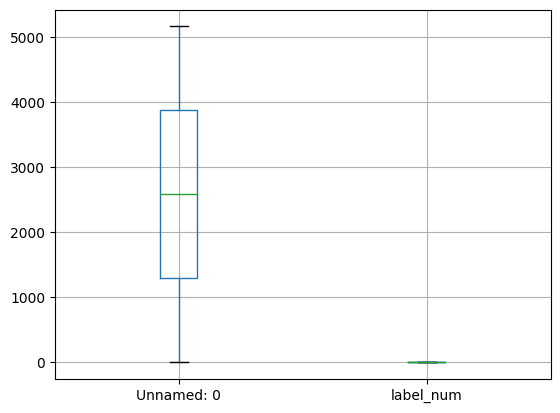

In [49]:
# plot the boxplot

df.boxplot()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'label_num'}>]], dtype=object)

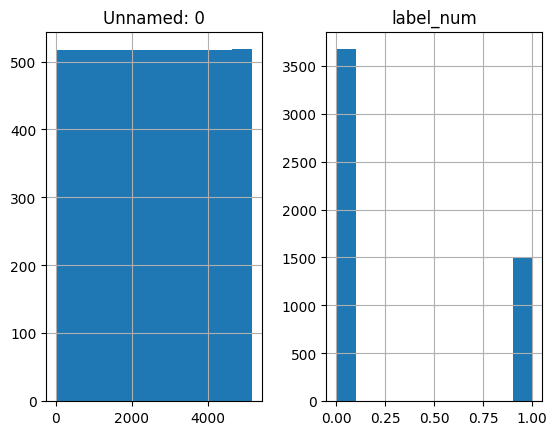

In [50]:

# plot the hist plot

df.hist()

### Dropping some unnecessary column

In [51]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [52]:
df.columns

Index(['label', 'text', 'label_num'], dtype='object')

In [53]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [54]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

Since both the columns i.e.. 'label', 'label num' have same data so we have to  drop label_num column for better data analysis.

In [55]:
# drop the column label_num also
df.drop("label_num", axis=1, inplace=True)

In [56]:
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


### Renaming the column

In [57]:
# Renaming Column Names
df.columns = ['Category','Subject']

# checking for column names
df.columns

Index(['Category', 'Subject'], dtype='object')

In [58]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

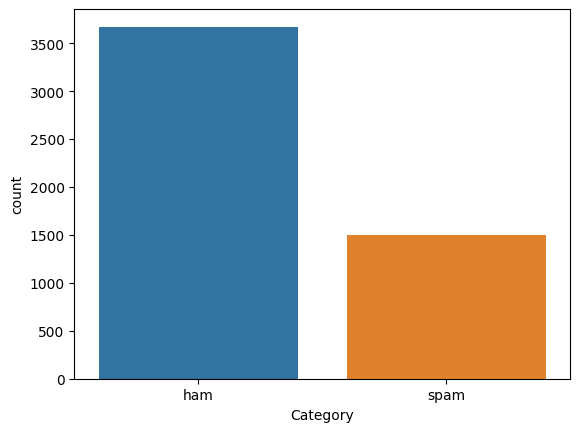

In [59]:
# Plotting Countplot for Category Column
sns.countplot(data = df , x = 'Category')
plt.show()

In [60]:
df.duplicated().sum()

178

In [61]:
# Dropping Duplicated Values
df.drop_duplicates()

,Category,Subject
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


### Data Cleaning

In [62]:
# labelling ham with 0 and spam with 1 for linear regression
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1
df

,Category,Subject
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,1,Subject: put the 10 on the ft\r\nthe transport...
5167,1,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,1,Subject: calpine daily gas nomination\r\n>\r\n...
5169,1,Subject: industrial worksheets for august 2000...


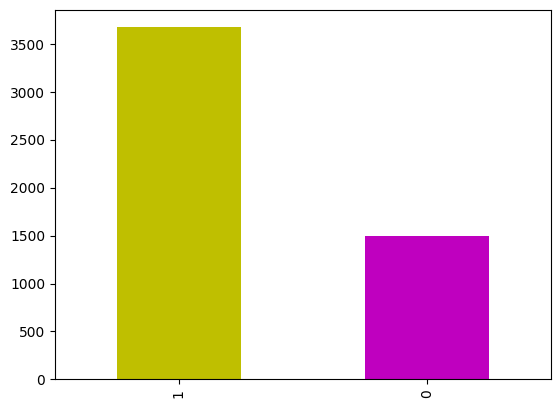

In [63]:
# Plotting barplot for Count of Category Column
df['Category'].value_counts().plot(kind='bar',color=('y','m'))
plt.show()

In [86]:
# showing the subject column
df["Subject"]

0       subject enron methanol meter this is a follow ...
1       subject hpl nom for january see attached file ...
2       subject neon retreat ho ho ho we re around to ...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal is to book...
                              ...                        
5166    subject put the on the ft the transport volume...
5167    subject and following noms hpl can t take the ...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets for august activ...
5170    subject important online banking alert dear va...
Name: Subject, Length: 5171, dtype: object

### Subject column

Every Row of this Column has lower case and special characters in a data. So first we will convert the text into lower case and then we will clean the data by removing all these special characters.

For Removing this we use the RegexpTokenizer function from the Natural Language Toolkit (NLTK) library to tokenize the string using the regular expression pattern.

In [65]:
from nltk.tokenize import RegexpTokenizer

In [66]:
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower() #converting string into lowercase
    tokens = reg.tokenize(string) # tokenize the string on the defined pattern
    return " ".join(tokens) # joining the tokens with single space character and returning the output

In [67]:
# Applying lambda function for changing the data of 'Subject' Column
df['Subject'] = df['Subject'].apply(lambda string: clean_str(string))

In [68]:
df

,Category,Subject
0,1,subject enron methanol meter this is a follow ...
1,1,subject hpl nom for january see attached file ...
2,1,subject neon retreat ho ho ho we re around to ...
3,0,subject photoshop windows office cheap main tr...
4,1,subject re indian springs this deal is to book...
...,...,...
5166,1,subject put the on the ft the transport volume...
5167,1,subject and following noms hpl can t take the ...
5168,1,subject calpine daily gas nomination julie as ...
5169,1,subject industrial worksheets for august activ...


In [69]:
X = df['Category']

Y = df['Subject']

In [70]:
print(X)

0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: Category, Length: 5171, dtype: object


In [71]:
print(Y)

0       subject enron methanol meter this is a follow ...
1       subject hpl nom for january see attached file ...
2       subject neon retreat ho ho ho we re around to ...
3       subject photoshop windows office cheap main tr...
4       subject re indian springs this deal is to book...
                              ...                        
5166    subject put the on the ft the transport volume...
5167    subject and following noms hpl can t take the ...
5168    subject calpine daily gas nomination julie as ...
5169    subject industrial worksheets for august activ...
5170    subject important online banking alert dear va...
Name: Subject, Length: 5171, dtype: object


## Splitting the data into training data and test data

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [73]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [74]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


### Featured Extraction

In [75]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

#min_df is tell the model that what is the minimum frequency for a word to consider.
#stop_words is a inbuilt function which is used to tell the model to remove the basic words like the, as, a, in etc.
#lowercase is used to lowercase all letters in the mail.


In [76]:
Y_train_featured = feature_extraction.fit_transform(Y_train)
Y_test_featured = feature_extraction.transform(Y_test)

In [77]:
print(Y_train)

3628    subject meter scherlyn per our conversation he...
2491    subject natural gas nomination for enron metha...
3262    subject cleburne outage gentlemen i wanted to ...
2972    subject daren the firm trading waha book has b...
2481    subject re mon feb page loading image not show...
                              ...                        
4931    subject re pretty boy wants to meet his soulma...
3264    subject if you need to make money learn from t...
1653    subject find out where to buy drugs cheap find...
2607    subject job survey and matching heather darren...
2732    subject forwarded by tom acton corp enron on p...
Name: Subject, Length: 4136, dtype: object


In [78]:
print(Y_train_featured)
# Text is successfully converted into the numerical form

  (0, 34843)	0.209674553125394
  (0, 17597)	0.21749164358073084
  (0, 35016)	0.25752744732861527
  (0, 24052)	0.14133037133722523
  (0, 12362)	0.23041955710463574
  (0, 21064)	0.18690079795641928
  (0, 20012)	0.12219812145536768
  (0, 20732)	0.1316413681304691
  (0, 31462)	0.25306377591220497
  (0, 34391)	0.17408496520088396
  (0, 8128)	0.16346769341772793
  (0, 23933)	0.18952860841730024
  (0, 21914)	0.18797819133930524
  (0, 13535)	0.21436091487202985
  (0, 23262)	0.21360930091171546
  (0, 8188)	0.2691224181448108
  (0, 30756)	0.41209823477907254
  (0, 22615)	0.4167946496245476
  (0, 33287)	0.04772650009362891
  (1, 26953)	0.12968696823568582
  (1, 23312)	0.16840793303087576
  (1, 23480)	0.1892561946689478
  (1, 11794)	0.19616932840527507
  (1, 9379)	0.19252222664107874
  (1, 23050)	0.2038437513299149
  :	:
  (4135, 15758)	0.12162838130188036
  (4135, 389)	0.26723642070815484
  (4135, 28828)	0.10925795588389492
  (4135, 23260)	0.08506967613644434
  (4135, 32084)	0.1104144485252494
  

### Logistic Regression

In [79]:
model = LogisticRegression()

:Training the Logistic Regression Model with the Training Data

In [80]:
model.fit(Y_train_featured,X_train)

LogisticRegression()

Checking the Accuracy of the Model

In [81]:
Prediction_on_train_data = model.predict(Y_train_featured)

In [82]:
accuracy_on_train_data = accuracy_score(X_train,Prediction_on_train_data)
print(accuracy_on_train_data)

0.9963733075435203


In [83]:
Prediction_on_test_data = model.predict(Y_test_featured)
accuracy_on_test_data = accuracy_score(X_test,Prediction_on_test_data)
print(accuracy_on_test_data)

0.9874396135265701


Predicting mail

In [85]:
## mail from user input
mail=["I got an offer letter from CodersCave"]
predict=feature_extraction.transform(mail)
final_prediction=model.predict(predict)
print(final_prediction)
if final_prediction[0]==0:
  print("Ham Mail")
else:
  print("Spam Mail")

[0]
Ham Mail


This mail is ham which means not spam